In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np

# Load data
conn = sqlite3.connect('../data/nba_development.db')
player_data = pd.read_sql('SELECT * FROM player_development', conn)
breakout_data = pd.read_sql('SELECT * FROM breakout_candidates', conn)

print("NBA Player Development Analysis")
print("=" * 50)
print(f"Total player records: {len(player_data)}")
print(f"Unique players: {player_data['PLAYER_NAME'].nunique()}")
print(f"Breakout candidates identified: {len(breakout_data)}")

NBA Player Development Analysis
Total player records: 1716
Unique players: 818
Breakout candidates identified: 8


In [4]:
# Check what columns we actually have
print("Available columns:")
print(player_data.columns.tolist())
print("\nFirst few rows:")
print(player_data.head())

# Top performers analysis (using actual column names)
print("\nTOP DEVELOPMENT METRICS:")
print("-" * 30)

# Check if we have the right columns and use alternatives
if 'TS_PCT' in player_data.columns:
    ts_col = 'TS_PCT'
elif 'ts_percentage' in player_data.columns:
    ts_col = 'ts_percentage'
else:
    print("True Shooting % column not found")
    ts_col = None

if ts_col:
    top_efficient = player_data.nlargest(10, ts_col)
    print(f"Most Efficient Shooters:")
    for _, player in top_efficient.head().iterrows():
        print(f"{player['PLAYER_NAME']}: {player[ts_col]:.3f} TS%")

# Best development scores
if 'DEV_SCORE' in player_data.columns:
    dev_col = 'DEV_SCORE'
elif 'development_score' in player_data.columns:
    dev_col = 'development_score'
else:
    print("Development score column not found")
    dev_col = None

if dev_col:
    top_dev = player_data.nlargest(10, dev_col)
    print(f"\nHighest Development Scores:")
    for _, player in top_dev.head().iterrows():
        print(f"{player['PLAYER_NAME']}: {player[dev_col]:.2f}")

# Show top scorers as backup
print(f"\nTop Scorers:")
if 'PTS' in player_data.columns:
    top_scorers = player_data.nlargest(10, 'PTS')
    for _, player in top_scorers.head().iterrows():
        print(f"{player['PLAYER_NAME']}: {player['PTS']:.1f} PPG")

Available columns:
['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'TEAM_COUNT', 'SEASON', 'TS_PCT', 'PER_SIMPLE', 'USG_RATE', 'DEV_SCORE', 'PREV_PTS', 'PREV_TS_PCT', 'PREV_USG_RATE', 'PTS_IMPROVEMENT', 'TS_IMPROVEMENT', 'USG_IMPROVEMENT', 'OVERALL_IMPROVEMENT']

First few rows:
   PLAYER_ID  PLAYER_NAME NICKNA

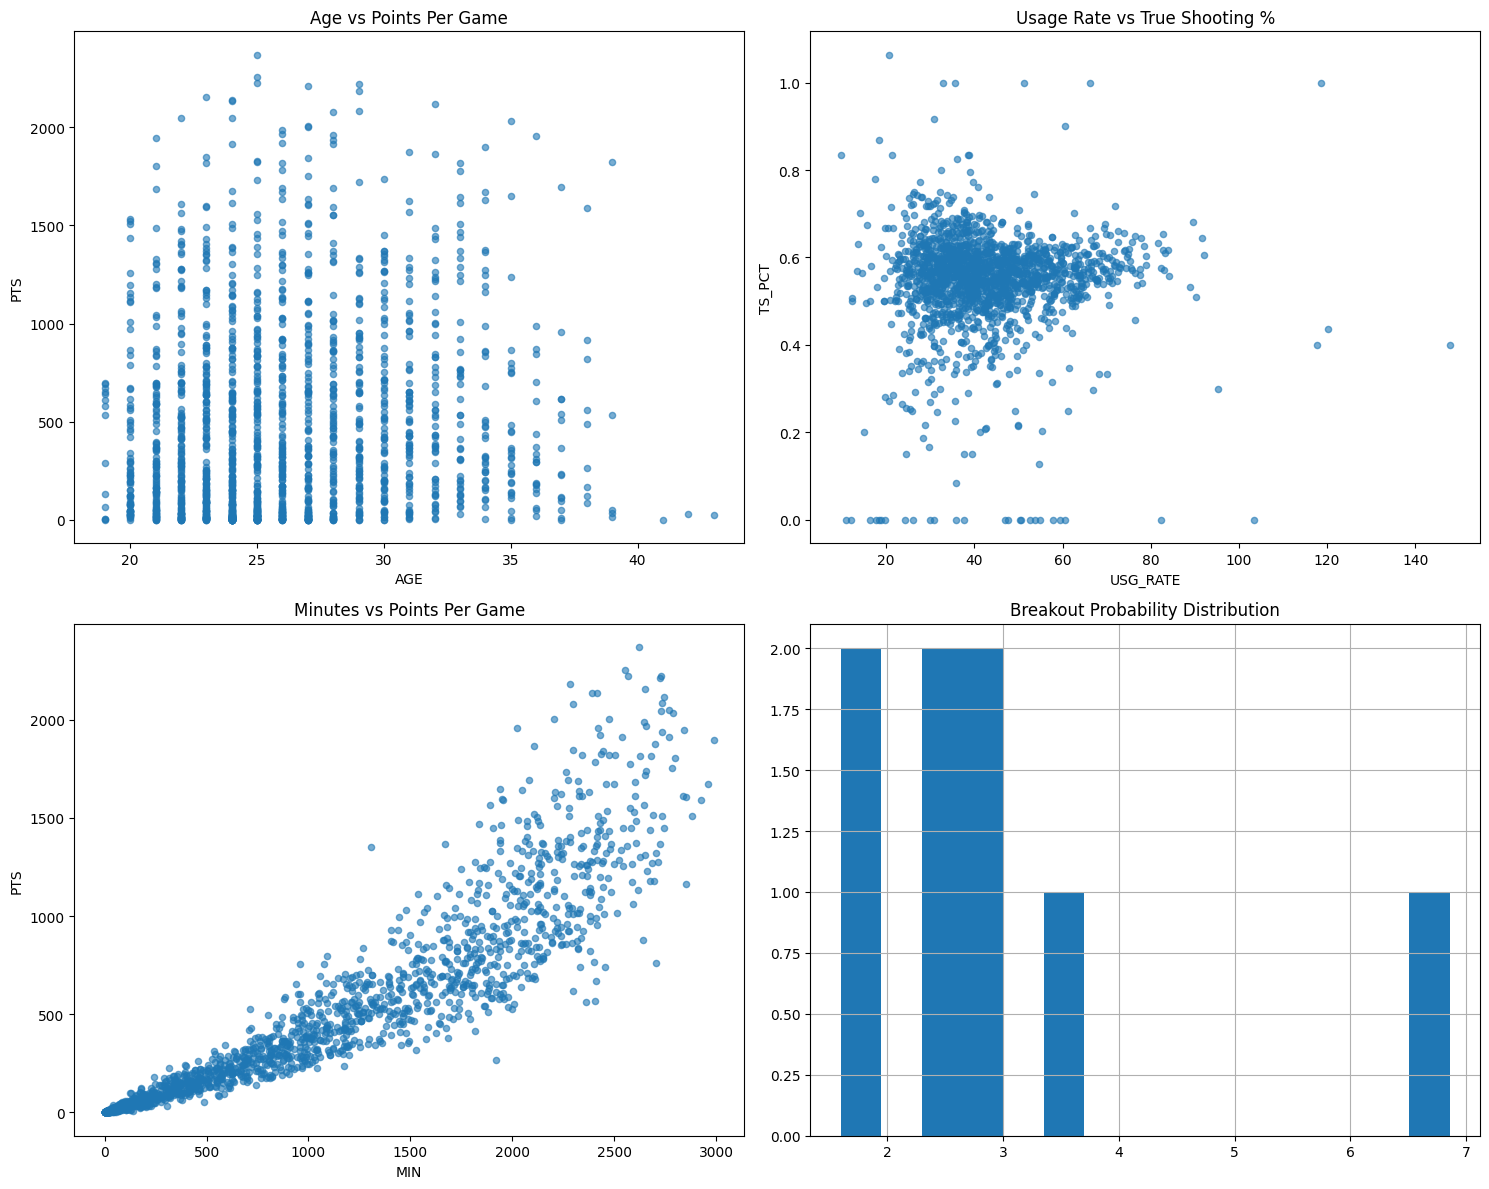

In [6]:
# Visualizations with correct column names
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Use the actual column names we found
age_col = 'AGE' if 'AGE' in player_data.columns else 'age'
pts_col = 'PTS' if 'PTS' in player_data.columns else 'points_per_game'
ts_col = 'TS_PCT' if 'TS_PCT' in player_data.columns else 'ts_percentage'
usg_col = 'USG_RATE' if 'USG_RATE' in player_data.columns else 'usage_rate'
min_col = 'MIN' if 'MIN' in player_data.columns else 'minutes_per_game'

# Age vs Points
if age_col in player_data.columns and pts_col in player_data.columns:
    player_data.plot.scatter(x=age_col, y=pts_col, alpha=0.6, ax=axes[0,0])
    axes[0,0].set_title('Age vs Points Per Game')

# Usage vs Efficiency (if available)
if usg_col in player_data.columns and ts_col in player_data.columns:
    player_data.plot.scatter(x=usg_col, y=ts_col, alpha=0.6, ax=axes[0,1])
    axes[0,1].set_title('Usage Rate vs True Shooting %')

# Minutes vs Points
if min_col in player_data.columns and pts_col in player_data.columns:
    player_data.plot.scatter(x=min_col, y=pts_col, alpha=0.6, ax=axes[1,0])
    axes[1,0].set_title('Minutes vs Points Per Game')

# Breakout probability distribution
if len(breakout_data) > 0 and 'BREAKOUT_PROB' in breakout_data.columns:
    breakout_data['BREAKOUT_PROB'].hist(bins=15, ax=axes[1,1])
    axes[1,1].set_title('Breakout Probability Distribution')

plt.tight_layout()
plt.show()